# INTRODUCTION

Quora is an online platform to ask and answer questions across a community of users, who express their opinions to the questions posted. Founded in 2009, over the years it has grown leaps and bounds among the online community. Since people are entitled to post their questions and opinions, Quora is flooded with millions of questions with many of them being unanswered too. Most of the questions that are left unanswered have duplicates which are not taken care of. The new questions ought to be compared with the existing ones to check the similarity between both and if they convey the same meaning then the new one must be discarded. Developed a model to classify the duplicate questions. 


## ABOUT DATASET

The dataset used in the present study is the “Quora Question Pairs” is given by Kaggle. The dataset was officially released by the Quora Machine Learning team in their website in 2017.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the dataset
train=pd.read_csv('D:/DataScience/Qoura/quora-question-pairs/train.csv')
test=pd.read_csv('D:/DataScience/Qoura/quora-question-pairs/test.csv')

## Data Dictionary

Data fields

id - the id of a training set question pair

qid1, qid2 - unique ids of each question (only available in train.csv)

question1, question2 - the full text of each question

is_duplicate - the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise

In [3]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


## Data Visualization

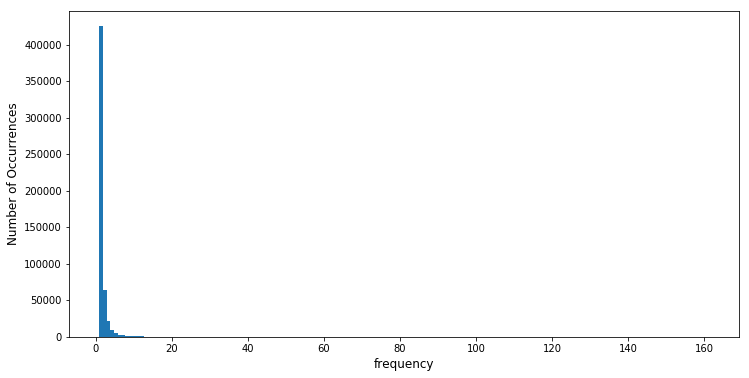

In [12]:
all_ques_train = train['question1'].append(train['question2'])

freq =all_ques_train.value_counts()
freqval =freq.values


plt.figure(figsize=(12,6))
plt.hist(freqval,bins=165)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('frequency', fontsize=12)
plt.show()


## Number of words distribution:


In [15]:
all_ques_df = pd.DataFrame(pd.concat([train['question1'], train['question2']]))
all_ques_df.columns = ["questions"]

all_ques_df["num_of_words"] = all_ques_df["questions"].apply(lambda x : len(str(x).split()))

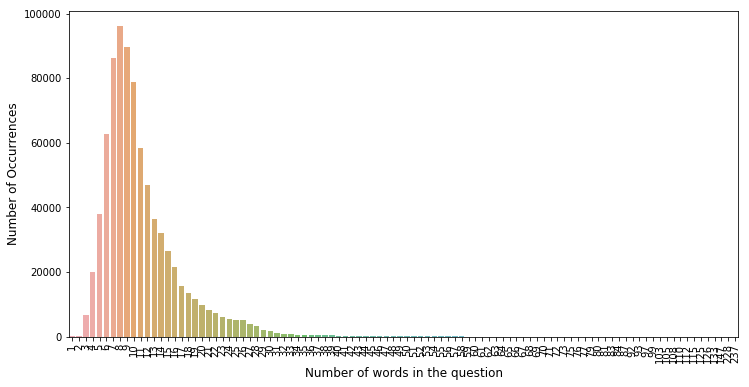

In [20]:
cnt_srs = all_ques_df['num_of_words'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of words in the question train', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [21]:
all_ques_test = pd.DataFrame(pd.concat([test['question1'], test['question2']]))
all_ques_test.columns = ["questions"]

all_ques_test["num_of_words"] = all_ques_test["questions"].apply(lambda x : len(str(x).split()))

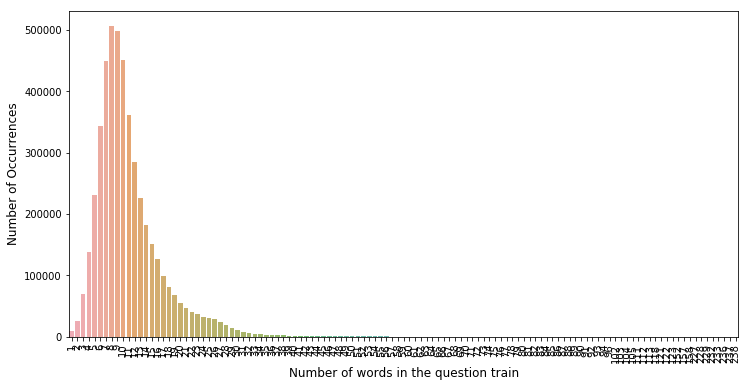

In [22]:
cnt_test = all_ques_test['num_of_words'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_test.index, cnt_test.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of words in the question train', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [6]:
def punc(df,stri):
    df[stri] = df[stri].str.lower().str.replace('[^a-z]', ' ')
    df[stri] = df[stri].str.lower().str.replace('[^\w\s]',' ')
    df[stri] = df[stri].str.lower().str.replace(r'<.*?>',' ')
    df[stri] = df[stri].str.lower().str.replace(' br ',' ')
    return df

In [7]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [8]:
train=punc(train,"question1")
train=punc(train,"question2")
test=punc(test,"question2")
test=punc(test,"question1")

In [9]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math math i...,0
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0


In [10]:
train.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [11]:
test.isna().sum()

test_id      0
question1    2
question2    4
dtype: int64

In [12]:
test=test.dropna()
train=train.dropna()

In [13]:
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [14]:
def stopi(df,stri): 
    df[stri] = df[stri].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    return df

In [15]:
train=stopi(train,"question1")
train=stopi(train,"question2")
test=stopi(test,"question2")
test=stopi(test,"question1")

In [16]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,step step guide invest share market india,step step guide invest share market,0
1,1,3,4,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...,0
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0
3,3,7,8,mentally lonely solve,find remainder math math divided,0
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
id              404287 non-null int64
qid1            404287 non-null int64
qid2            404287 non-null int64
question1       404287 non-null object
question2       404287 non-null object
is_duplicate    404287 non-null int64
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [18]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
def port(df,stri):
    df[stri] = df[stri].apply(lambda x: " ".join(ps.stem(word) for word in x.split()))
    return df

In [21]:
train=port(train,"question1")
train=port(train,"question2")
test=port(test,"question1")
test=port(test,"question2")

In [20]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,step step guid invest share market india,step step guid invest share market,0
1,1,3,4,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh ...,0
2,2,5,6,increas speed internet connect use vpn,internet speed increas hack dn,0
3,3,7,8,mental lone solv,find remaind math math divid,0
4,4,9,10,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0


In [34]:
import nltk
from nltk import *
from nltk.corpus import wordnet
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to C:\Users\Ram Kumar R
[nltk_data]     P\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [35]:
train['question1'] = train['question1'].apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(word) for word in x.split()))
train['question2'] = train['question2'].apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(word) for word in x.split()))
test['question1'] = test['question1'].apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(word) for word in x.split()))
test['question2'] = test['question2'].apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(word) for word in x.split()))

In [36]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,step step guid invest share market india,step step guid invest share market,0
1,1,3,4,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh ...,0
2,2,5,6,increa speed internet connect use vpn,internet speed increa hack dn,0
3,3,7,8,mental lone solv,find remaind math math divid,0
4,4,9,10,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0


In [37]:
from difflib import SequenceMatcher
a = "Dump Administration Dismisses Surgeon General Vivek Murthy (http)PUGheO7BuT5LUEtHDcgm"
b = "Dump Administration Dismisses Surgeon General Vivek Murthy (http)avGqdhRVOO"
ratio = SequenceMatcher(None, a, b).ratio()
ar=[]
for index, row in train.iterrows():
    #print(row['c1'], row['c2'])
    a=SequenceMatcher(None,row['question1'],row['question2']).ratio()
    ar.append(a)
    

In [38]:
train['simi']=ar
train.head()

,id,qid1,qid2,question1,question2,is_duplicate,simi
0,0,1,2,step step guid invest share market india,step step guid invest share market,0,0.918919
1,1,3,4,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh ...,0,0.617021
2,2,5,6,increa speed internet connect use vpn,internet speed increa hack dn,0,0.454545
3,3,7,8,mental lone solv,find remaind math math divid,0,0.272727
4,4,9,10,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0,0.235294


In [39]:
train['sim'] = np.where(train['simi']==1.0, 1, 0)
train.head()

,id,qid1,qid2,question1,question2,is_duplicate,simi,sim
0,0,1,2,step step guid invest share market india,step step guid invest share market,0,0.918919,0
1,1,3,4,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh ...,0,0.617021,0
2,2,5,6,increa speed internet connect use vpn,internet speed increa hack dn,0,0.454545,0
3,3,7,8,mental lone solv,find remaind math math divid,0,0.272727,0
4,4,9,10,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0,0.235294,0


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words ='english', smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')

In [41]:
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm=None, preprocessor=None,
                smooth_idf=False, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)